<a href="https://colab.research.google.com/github/bethdfuller/MSDA/blob/main/D209_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D209: Task 1: Classification Analysis

### Beth Fuller

### July 2024

## A1: Research Question

Can customer churn be accurately predicted using the Naive Bayes model with the provided categorical data?

## A2: Goal

The goal of this analysis is to accurately predict customer churn probability using the Naive Bayes classification algorithm. This will benefit the telecommunications company in that it would allow them to focus on retaining established customers.

## B1: Naive Bayes Method

Predicting customer churn is an ongoing project for the telecommunications company, making the Naive Bayes classification model an excellent fit for now and the future. Based on Bayes' Theorem, the Naive Bayes model can update its observations with new information, leading to more accurate classifications (Larose, 2019). This model provides probabilities of customer churn based on the features provided.

## B2: Assumptions of Naive Bayes

The Naive Bayes model assumes that the effect of each feature is independent of others. Despite this unrealistic assumption, the model has been historically successful and accurate in use cases like spam filters (Grus, 2019).

## B3: Python Packages & Libraries

* pandas
  * reading and displaying csv
  * data transformation - get_dummies
* seaborn
  * visualization - heatmap
* matplotlib
  * plots - boxplots, confusion matrix plot
* sklearn -
  * split the data for the Naive Bayes model - train_test_split
  * Naive Bayes model - naive_bayes GaussianNB
  * metrics - confusion matrix
  * model performance metrics
* numpy
  * random number


## C1: Data Preprocessing Goal

The primary goal of preprocessing was to get the data into a format that will be able to be used with the Naive Bayes model. The main issue in the data were several Yes/No columns (e.g. Techie, Tablet) and several categorical variable columns (e.g. Area, Marital). One hot encoding was utilized to perform this step.

## C2: Variables

Target/Dependent Variable: Churn
Churn is a categorical variable.

Numeric Variables:
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts
* Yearly_equip_failure
* Tenure
* Monthly Charge
* Bandwidth GB Year

Categorical Variables:
* Area
* Marital
* Gender
* Internet Service
* PaymentMethod
* Contract
* Techie
* Port_modem
* Tablet
* Phone
* Multiple
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* PaperlessBilling

## C3: Data Cleaning



The initial data inspection showed 10,000 records and 50 attributes. The data will be cleaned via the following steps which follows previous work (Fuller, 2024):

* **Drop** - columns that are unnecessary.
* **Missing values** - check for and address missing values (i.e. delete, input).
  * .isnull.sum()
* **Duplicate values** - check for and address duplicate values (i.e remove).
  * .duplicated()
  * .duplicated().valuecounts()
* **Outliers** - check for and address outliers.
  * .describe()
  * .plot to create box plots
* **One Hot Encoding** - categorical that does not have an ordinal relationship will be transformed via one hot encoding.
  * .get_dummies
  * drop_first=True will be used with boolean categorical variables
  * drop_first=False will be used when there are 2+ categorical options

# Code

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn import metrics


# Display maximum columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 60)

# URL to churn data set
url = 'https://raw.githubusercontent.com/bethdfuller/MSDA/main/D209/churn_clean.csv'

# Read churn data set / use keep_default_na to correctly read InternetService value of None
churndf = pd.read_csv(url, keep_default_na=False)

In [ ]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### C3: Drop Columns

In [ ]:
# Columns to drop
drop_columns = ['CaseOrder', 'Interaction', 'UID', 'City', 'State',
                'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
                'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7',
                'Item8']

# Drop columns

churndf.drop(columns=drop_columns, inplace=True)

churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

### C3: Missing Values

In [ ]:
churndf.isnull().sum()

,0
Customer_id,0
Area,0
Children,0
Age,0
Income,0
Marital,0
Gender,0
Churn,0
Outage_sec_perweek,0
Email,0


### C3: Duplicates

In [ ]:
churndf.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
churndf.duplicated().value_counts()

,count
False,10000


### C3: Outliers

In [ ]:
churndf.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


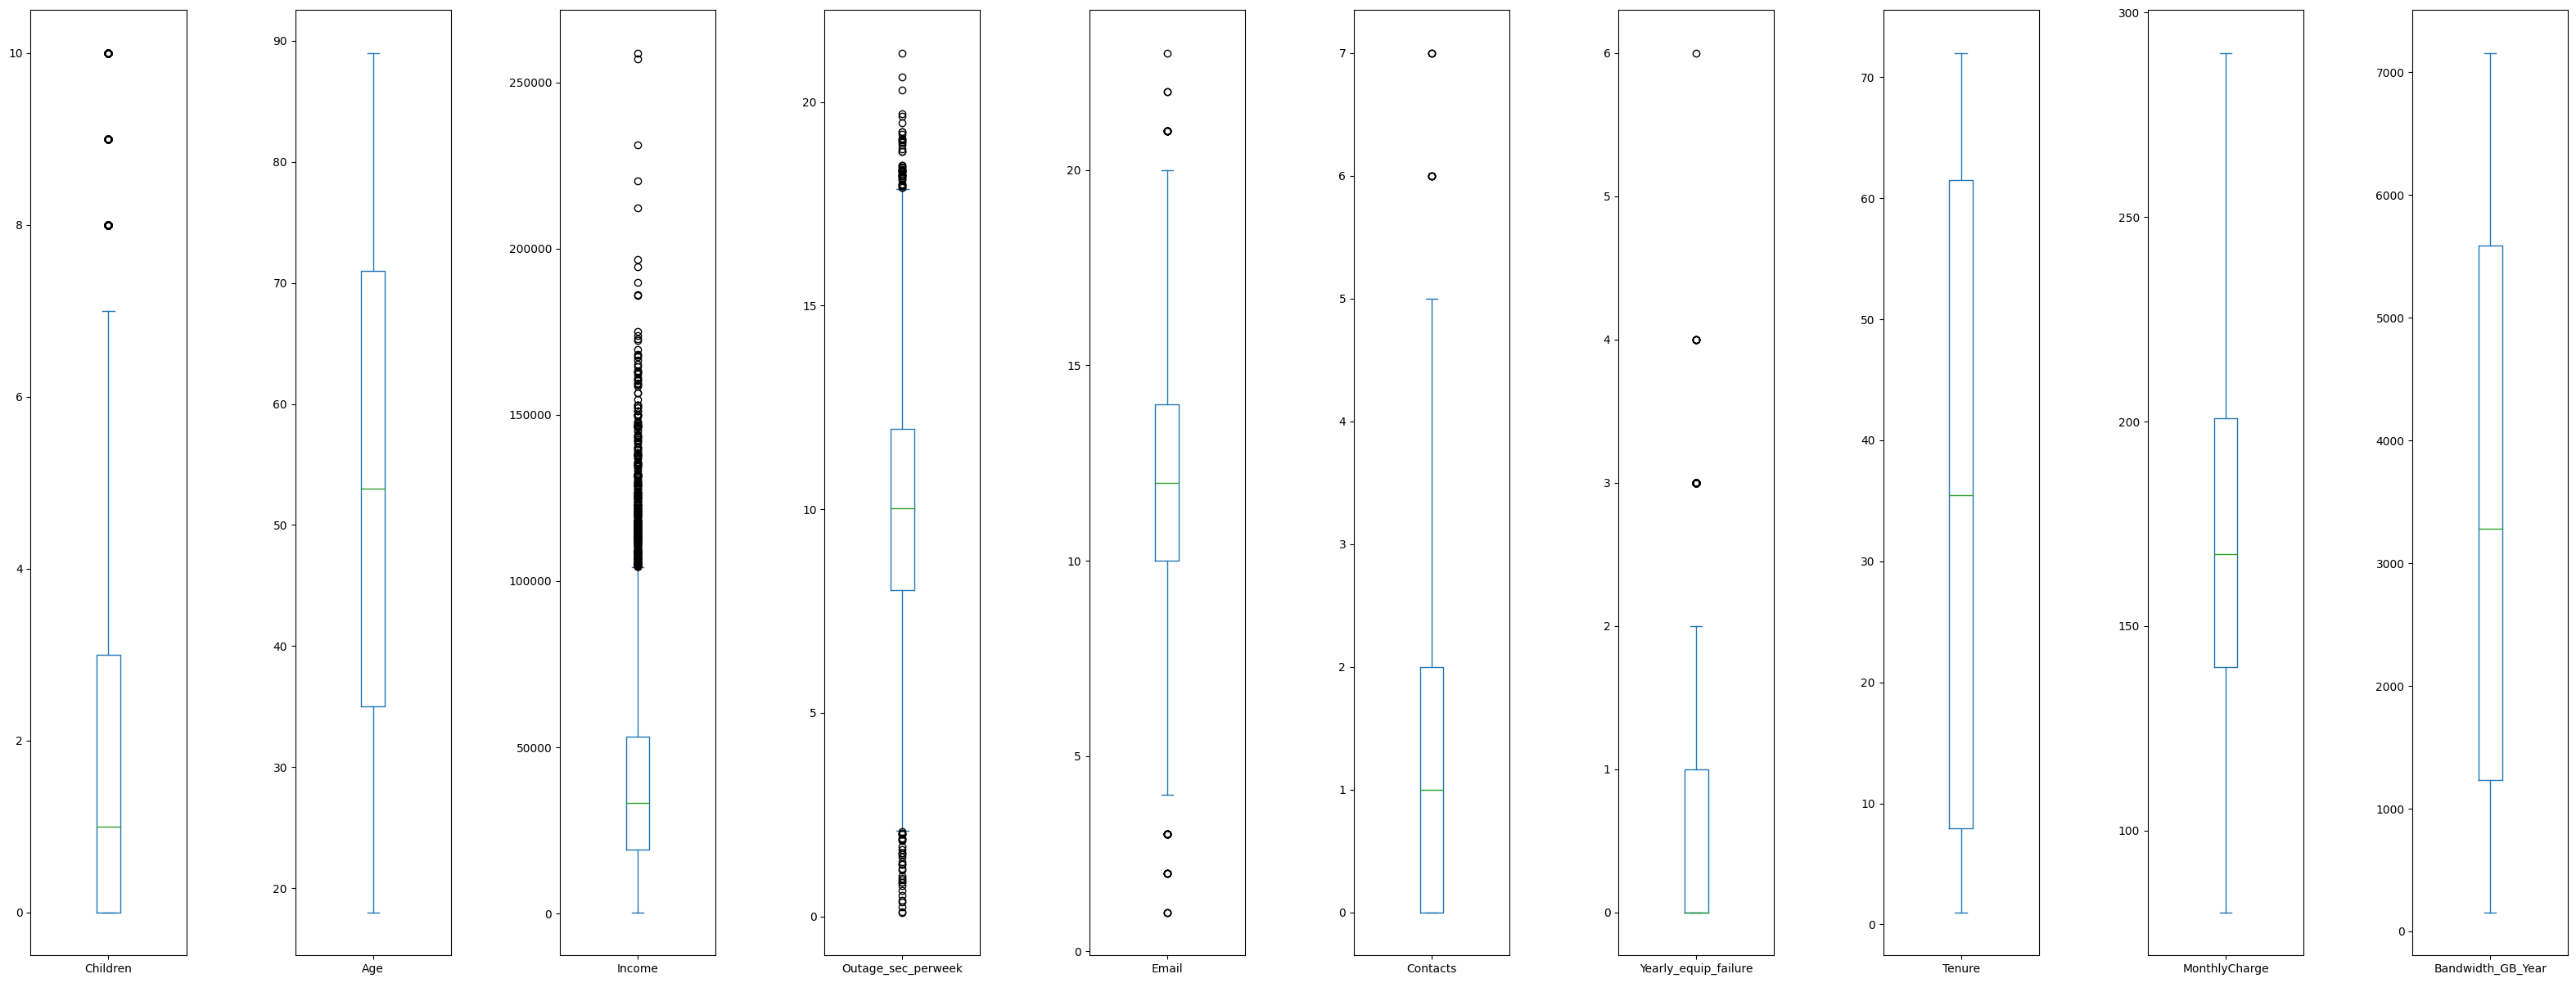

In [ ]:
# Boxplots to view variable outliers

churndf.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(40, 15)
)

plt.subplots_adjust(wspace=0.7)
plt.show()

### C3: Data Transformation

In [ ]:
churndf_e = pd.get_dummies(churndf, columns=['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling'], drop_first=True)

churndf_e = pd.get_dummies(churndf_e, columns=['Area', 'Marital', 'Gender', 'InternetService', 'PaymentMethod', 'Contract'], drop_first=False)

churndf_e.info()
churndf_e.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer_id                             10000 non-null  object 
 1   Children                                10000 non-null  int64  
 2   Age                                     10000 non-null  int64  
 3   Income                                  10000 non-null  float64
 4   Outage_sec_perweek                      10000 non-null  float64
 5   Email                                   10000 non-null  int64  
 6   Contacts                                10000 non-null  int64  
 7   Yearly_equip_failure                    10000 non-null  int64  
 8   Tenure                                  10000 non-null  float64
 9   MonthlyCharge                           10000 non-null  float64
 10  Bandwidth_GB_Year                       10000 non-null  flo

,Customer_id,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,K409198,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,True,True,True,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
1,S120509,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False
2,K191035,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,True,True,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True
3,D90850,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True
4,K662701,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,True,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False


## C4: Export CSV

In [ ]:
churndf_e.to_csv('churndf_clean_nb.csv', index=False)

# Naive Bayes Model

### D1: Split Test / Training

The test size of the data for the Naive Bayes model will be 0.33.

In [ ]:
X = churndf_e.drop(columns=['Churn_Yes', 'Customer_id'])
y = churndf_e['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=107)

In [ ]:
customer_ids = churndf_e['Customer_id']

#### Export Testing / Training Data Set

In [ ]:
X_train.to_csv('nb_x_train.csv', index=False)
X_test.to_csv('nb_x_test.csv', index=False)
y_train.to_csv('nb_y_train.csv', index=False)
y_test.to_csv('nb_y_test.csv', index=False)

### D2: Naive Bayes Model / E2: Results

The Naive Bayes model was built by following a Data Camp tutorial (DataCamp, 2025). The data will be cleaned, transformed (one hot encoding), split into testing/training, and then loaded into the sklearn (scikit-learn) Gaussian Naive Bayes model. The Naive Bayes model will then be evaluated by using accuracy, F1, confusion metrics, classification report and a ROC curve. A random sample with prediction Correct/Incorrect will be printed along with a list of customers with the highest likelihood of churning.

In [ ]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

accuray = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.776060606060606
F1 Score: 0.7630371177091636


The accuracy and F1 score indicate that the Naive Bayes model for predicting customer churn generalizes effectively and performs well, making it a valuable tool for the telecommunications company in identifying potential churn among customers.

### Test Print

This code randomly selects 20 samples from the test set, predicts whether each customer will churn using the Naive Bayes model, compares the predictions to the actual outcomes, and prints the prediction results alongside a label indicating whether each prediction was correct or incorrect.

In [ ]:
test_number = 20

for i in range(test_number):
    random_test = np.random.randint(0, len(X_test))
    test_sample = X_test.iloc[random_test].to_frame().T
    predict = model_nb.predict(test_sample)
    actual = y_test.iloc[random_test]
    label = "Correct" if predict[0] == actual else "Incorrect"
    print(f"Prediction: {predict[0]}, Actual: {actual}, {label}")


Prediction: False, Actual: False, Correct
Prediction: False, Actual: False, Correct
Prediction: True, Actual: False, Incorrect
Prediction: True, Actual: False, Incorrect
Prediction: True, Actual: False, Incorrect
Prediction: True, Actual: True, Correct
Prediction: False, Actual: False, Correct
Prediction: True, Actual: True, Correct
Prediction: False, Actual: False, Correct
Prediction: False, Actual: False, Correct
Prediction: True, Actual: True, Correct
Prediction: True, Actual: False, Incorrect
Prediction: True, Actual: False, Incorrect
Prediction: False, Actual: False, Correct
Prediction: False, Actual: False, Correct
Prediction: False, Actual: False, Correct
Prediction: False, Actual: False, Correct
Prediction: True, Actual: True, Correct
Prediction: True, Actual: False, Incorrect
Prediction: True, Actual: False, Incorrect


### D2: Confusion Matrix / E2: Results

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

Confusion Matrix:
 [[1821  631]
 [ 108  740]]


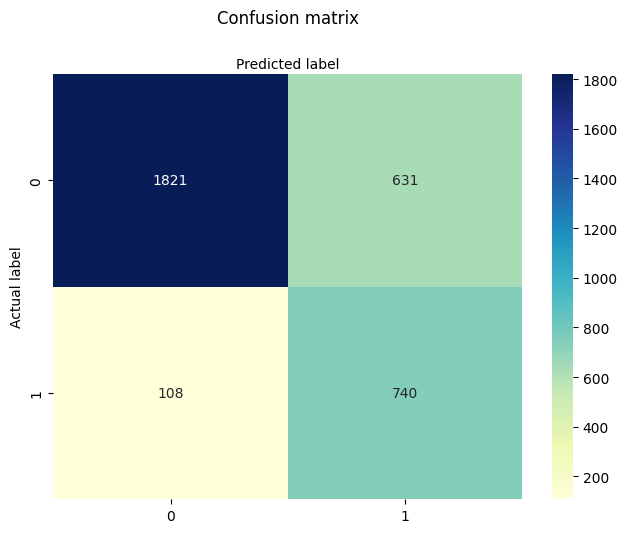

In [ ]:
class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

The confusion matrix is helpful in examining the Naive Bayes model’s accuracy and usefulness it shows:

True Negatives (TN): 1821 (correctly predicted not churn)
False Positives (FP): 631 (incorrectly predicted churn)
False Negatives (FN): 108 (incorrectly predicted not churn)
True Positives (TP): 740 (correctly predicted churn)

### D2: Classification Report / E2: Results

In [ ]:
target_names = ['Churn Yes', 'Churn No']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Churn Yes       0.94      0.74      0.83      2452
    Churn No       0.54      0.87      0.67       848

    accuracy                           0.78      3300
   macro avg       0.74      0.81      0.75      3300
weighted avg       0.84      0.78      0.79      3300



The classification report shows that the model is effective at predicting churned customers with high precision, but it performs worse for non-churned customers, as seen in the precision and F1 score for that class. The weighted averages give a balanced view of overall performance based on class proportions. For the telecommunications company, this model is especially useful for identifying customers likely to churn, making it a valuable tool for retention efforts.

### E1: Area Under the Curve (AUC) / ROC Curve / E2: Results

AUC Score: 0.9037241450952631


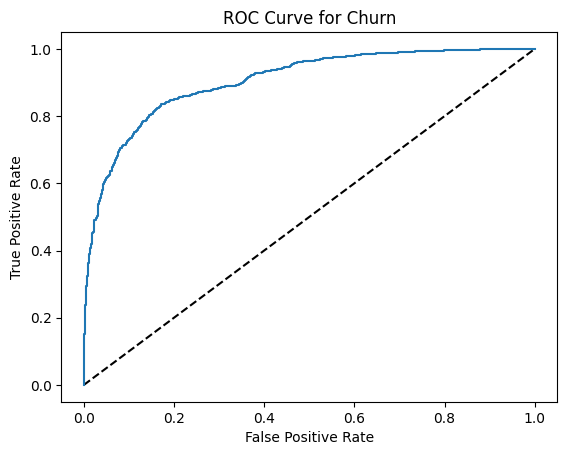

In [ ]:
# Predicted probabilities
y_predict_prob = model_nb.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_prob)

# Calculate AUC score
auc_score = metrics.roc_auc_score(y_test, y_predict_prob)

# Print the AUC score
print("AUC Score:", auc_score)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn')
plt.show()


The AUC score of 0.9037 indicates a strong model performance, suggesting that the model has a good ability to distinguish between churned and non-churned customers. This score is considered high, reflecting the model's effectiveness in predicting outcomes accurately (Dash, 2020).

### Customers Likely to Churn

In [ ]:
# Create a DataFrame to show the Customer_id and the predicted churn probability
results = pd.DataFrame({'Customer_id': customer_ids.iloc[X_test.index], 'Churn_Probability': y_predict_prob})

# Sort the results by Churn_Probability in descending order and show the top 20
top_20_results = results.sort_values(by='Churn_Probability', ascending=False).head(20)

# Display the top 20 results
print(top_20_results)

     Customer_id  Churn_Probability
4489     X942031           0.990313
266      L189856           0.990067
4205     E599152           0.989934
486      D195797           0.989685
927      O479736           0.989655
1018     Z215431           0.989101
3133     X258311           0.988611
4052     T732352           0.988589
2992     L643244           0.988200
1837     M379412           0.987695
4194     V968708           0.986238
1364      G27660           0.985816
443      H620644           0.985507
4908     E678852           0.985343
934      O270789           0.985046
200      J779175           0.984436
2018     O412041           0.984341
2417     Z799254           0.984266
1707      I20636           0.983564
1780     R305280           0.983112


### E2: Results Summary / Implications

The strong performance metrics of the Naive Bayes model—an AUC score of 0.9037, accuracy of 0.7761, F1 score of 0.7630, and a balanced confusion matrix—indicate a highly effective predictive tool for identifying customers at risk of churning. Here’s what these results mean for the company’s customer retention strategy and business decisions:

**AUC Score (0.9037):** The high AUC score reflects the model’s excellent ability to discern between customers who will and will not churn. The telecommunications company can therefore confidently utilize this model to prioritize the customers most at risk for churn.

**Accuracy (0.7761):** The accuracy score shows that the model correctly predicts customer behavior about 77.6% of the time. This high level of accuracy indicates that retention strategies compiled from the model’s predictions will be based on reliable data, allowing for accurately targeted interventions.

**F1 Score (0.7630):** F1 scores balance precision and recall. The high score of 76.3% shows that the model efficiently predicts true positives while minimizing false positives. This will ensure that the efforts based on this model are not wasted and are targeting customers genuinely at risk of leaving.

**Confusion Matrix:**
* True Positives (740): Customers correctly identified as churners.
* True Negatives (1821): Customers correctly identified as non-churners.
* False Positives (631): Customers incorrectly identified as churners.
* False Negatives (108): Customers incorrectly identified as non-churners.

The confusion matrix shows a relatively low number of false negatives, which is crucial for retaining customers. This model will minimize the number of customers that churn without being indicated as at risk.

In conclusion, the robust performance metrics of the Naive Bayes model provide a reliable foundation for making informed and strategic business decisions aimed at enhancing customer retention and ultimately improving the company’s profitability.

* **Classification Report**:
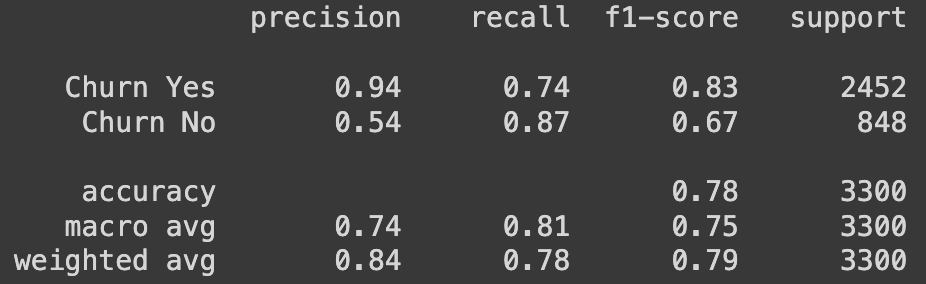

## E3: Limitation

The main limitation of the Naive Bayes model is its assumption of feature independence; it calculates each feature independently, ignoring potential interconnections among features that may influence the outcome.

## E4: Recommendations


The Naive Bayes model performs effectively with large datasets and can enhance accuracy with updated information. One recommendation is to use the developed tool to sort customers by their likelihood of churning, enabling the company to focus on targeted strategies for those at greatest risk. Additionally, reintroducing the data that was removed during the cleaning process could potentially improve the model's accuracy. Gathering more data and updating existing datasets with new information, followed by regularly rerunning the model, will help monitor changes in customer behavior and track the company’s growth or loss in the telecommunications industry.

## F: Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ae211bb3-24b7-4e64-bed1-b1b6001faafc

## Sources

* Dash, S. (2020, July 1). Understanding the ROC and AUC intuitively. Medium. https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02
* DataCamp. (n.d.). Naive Bayes classifier tutorial: With Python Scikit-learn. Retrieved July 2025 from https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
* Fuller, B. (2024, June.). D208 Task 2 [Jupyter Notebook]. GitHub. https://github.com/bethdfuller/MSDA/blob/main/D208/D208_Task2.ipynb
* Glen, S. (2019, June 19). Comparing classifiers: Decision trees, K-NN & Naive Bayes. Data Science Central. Retrieved from https://www.datasciencecentral.com/comparing-classifiers-decision-trees-knn-naive-bayes/
* Grus, J. (2019). Data science from scratch: First principles with Python (2nd ed.). O'Reilly Media.
* Larose, C. (2019). Data science using Python and R. Hoboken, NJ: Wiley.
* Towards Data Science. (2018, June 12). Bayes' theorem explained. Retrieved from https://towardsdatascience.com/bayes-theorem-explained-1b501d52ae37
